In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from collections import Counter

/Users/ahyeon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")
fulldata.shape

(586, 919)

In [3]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

In [4]:
for ii,c in enumerate(fulldata.columns):
    if 'Gcs' in c or 'GCS' in c:
        print(ii,c)

NameError: name 'fulldata' is not defined

In [5]:
for ii,c in enumerate(sub_bm_features):
    if 'Gcs' in c or 'GCS' in c:
        print(ii,c)

106 admGCSeyes
107 admGCSeyes.t
108 admGCSverb
109 admGCSverb.t
110 admGCSmotor
111 admGCSmotor.t
112 admGCSuntest
113 admGCS
114 GCSMildModSevereRecode


In [5]:
gcs = sub_bm[:,113]
mild = []
mod = []
sev = []
for g in gcs:
    if g <= 8:
        sev.append(g)
    elif (g >= 9 and g <=12):
        mod.append(g)
    else:
        mild.append(g)
    

In [16]:
len(mild), len(mod), len(sev)

(210, 13, 24)

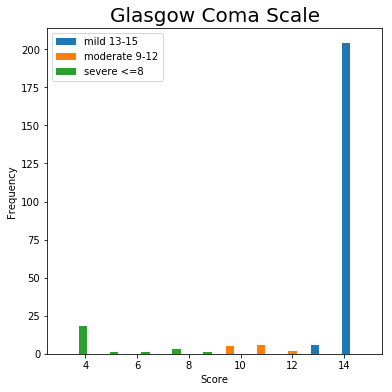

In [22]:
plt.figure(figsize=(6,6))
plt.hist([mild, mod, sev], label=['mild 13-15', 'moderate 9-12', 'severe <=8'])
plt.title('Glasgow Coma Scale', fontsize=20)
plt.legend()
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.savefig('/Users/ahyeon/Desktop/activ misc/gcs_hist.pdf')
plt.show()


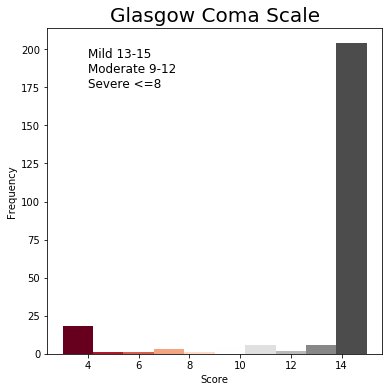

In [24]:
plt.figure(figsize=(6,6))

cm = plt.cm.get_cmap('RdGy')
n, bins, patches = plt.hist(gcs)
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/10)) # notice the i/25
plt.text(4,175, 'Mild 13-15\nModerate 9-12\nSevere <=8', fontsize=12)
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Glasgow Coma Scale', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ misc/gcs_hist.pdf')
plt.show()


5
5
5


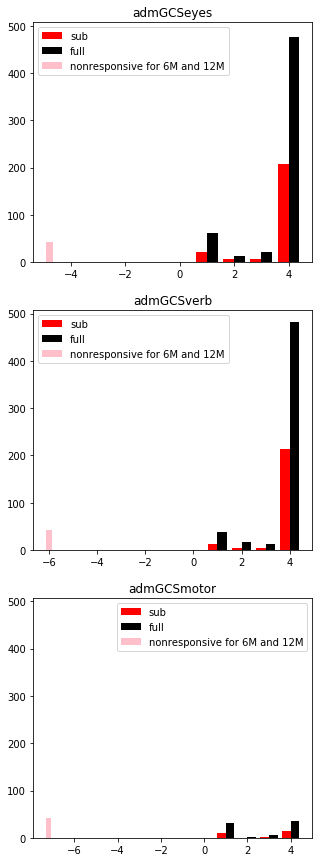

In [8]:
sub = [106,108,110]
full = [158,160,162]

names = ['admGCSeyes', 'admGCSverb', 'admGCSmotor', 'admGCSuntest', 'admGCS', 'GCSMildModSevereRecode']

fig, ax = plt.subplots(3,1,sharey=True,figsize=(5,15))
ax = ax.flatten()
count=0

for x, y, name in zip(sub, full, names):
    sub = sub_bm[:,x]
    full = fulldata.iloc[:,y]
    dat = sub
    dat2 = full
    
    num_na2 = dat2.isna().sum()
    print(num_na2)
    nonresponsive = 29+13
#     nonresponsive2 = 13

    dat2_dropna = dat2.dropna()
    counts, bins, bars = ax[count].hist([sub, dat2_dropna], align='left', label=['sub','full'], 
                     color=['red','black'], bins=np.arange(1,6))
    length = (bins[1]-bins[0])/4
    
    mx = max(dat2_dropna)
    na_index = -mx*(1+1/5) 
    na_index2 = -mx*(1+2/5)
        
    ax[count].bar(na_index, nonresponsive, color='pink', label='nonresponsive for 6M and 12M', width=length)
    ax[count].legend()
    
    ax[count].set_title('{}'.format(name))
    ax[count].legend()
    count += 1
plt.savefig('/Users/ahyeon/Desktop/activ misc/gcs2.pdf')